In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-11-30 23:25:59.974664: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-11-30 23:26:03.969532: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-30 23:26:04.058041: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-30 23:26:04.058491: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-30 23:26:04.058538: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [7]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 200


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)

reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=1e-7, mode='min')

# Custom CNN model

Training with Data Augmentation

Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 35s 28ms/step - loss: 0.3315 - accuracy: 0.8436 - val_loss: 0.2685 - val_accuracy: 0.8858
INFO:tensorflow:Assets written to: .model_a_lr/assets
Epoch 2/200
1200/1200 [==============================] - 34s 28ms/step - loss: 0.2556 - accuracy: 0.8874 - val_loss: 0.2975 - val_accuracy: 0.8270
Epoch 3/200
1200/1200 [==============================] - 35s 29ms/step - loss: 0.2322 - accuracy: 0.9023 - val_loss: 0.2292 - val_accuracy: 0.9077
INFO:tensorflow:Assets written to: .model_a_lr/assets
Epoch 4/200
1200/1200 [==============================] - 35s 29ms/step - loss: 0.2204 - accuracy: 0.9085 - val_loss: 0.2118 - val_accuracy: 0.9125
INFO:tensorflow:Assets written to: .model_a_lr/assets
Epoch 5/200
1200/1200 [==============================] - 34s 28ms/step - loss: 0.2113 - accuracy: 0.9126 - val_loss: 0.2132 - val_accuracy: 0.9217
Epoch 6/200
1200/1200 [==============================] - 33s 28ms/step - l

Epoch 99/200
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1153 - accuracy: 0.9559 - val_loss: 0.1450 - val_accuracy: 0.9461
Epoch 100/200
1200/1200 [==============================] - 34s 28ms/step - loss: 0.1148 - accuracy: 0.9553 - val_loss: 0.1450 - val_accuracy: 0.9470
Epoch 101/200
1200/1200 [==============================] - 34s 28ms/step - loss: 0.1177 - accuracy: 0.9561 - val_loss: 0.1447 - val_accuracy: 0.9464
Epoch 102/200
1200/1200 [==============================] - 34s 29ms/step - loss: 0.1167 - accuracy: 0.9552 - val_loss: 0.1446 - val_accuracy: 0.9469
INFO:tensorflow:Assets written to: .model_a_lr/assets
Epoch 103/200
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1143 - accuracy: 0.9569 - val_loss: 0.1450 - val_accuracy: 0.9460
Epoch 104/200
1200/1200 [==============================] - 34s 29ms/step - loss: 0.1169 - accuracy: 0.9546 - val_loss: 0.1448 - val_accuracy: 0.9465
Epoch 105/200
1200/1200 [============================

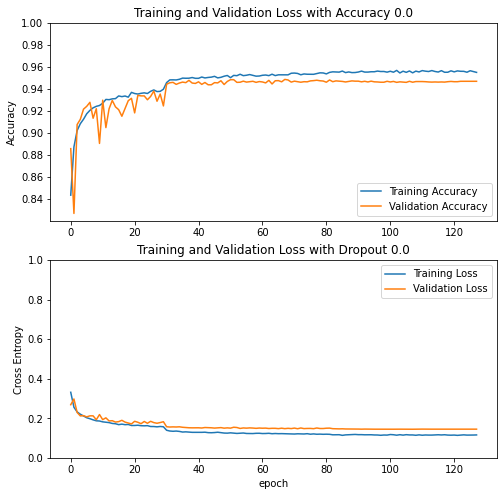

258/258 [==============================] - 4s 16ms/step - loss: 0.1360 - accuracy: 0.9504
Test accuracy : 0.9504072070121765


2022-11-29 08:09:33.236685: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2527334400 exceeds 10% of free system memory.
2022-11-29 08:09:37.972620: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2527334400 exceeds 10% of free system memory.
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.004s...
[t-SNE] Computed neighbors for 8227 samples in 5.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 5.280507
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.877136
[t-SNE] KL divergence after 2500 iterations: 2.144082


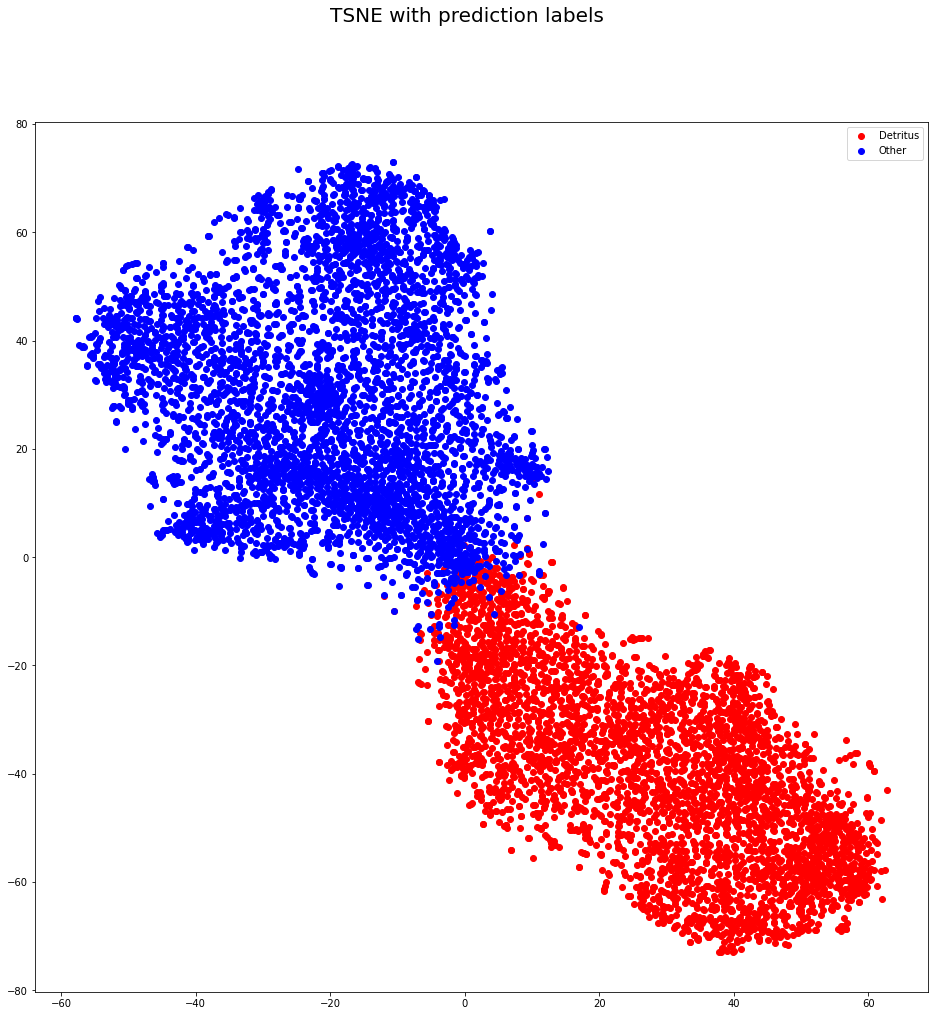

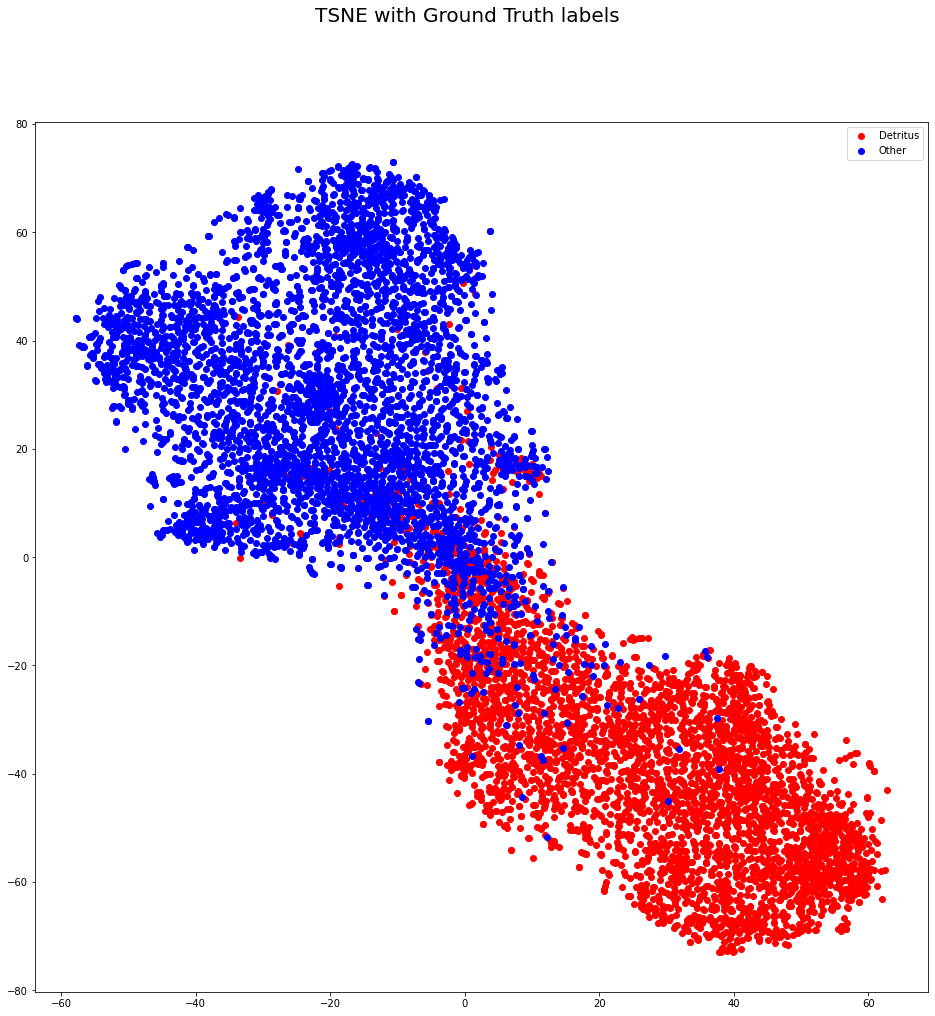

In [10]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_a_lr', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 36s 29ms/step - loss: 0.3526 - accuracy: 0.8293 - val_loss: 0.2789 - val_accuracy: 0.8704
INFO:tensorflow:Assets written to: .model_b_lr/assets
Epoch 2/200
1200/1200 [==============================] - 35s 29ms/step - loss: 0.2679 - accuracy: 0.8819 - val_loss: 0.2482 - val_accuracy: 0.8986
INFO:tensorflow:Assets written to: .model_b_lr/assets
Epoch 3/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.2464 - accuracy: 0.8933 - val_loss: 0.2491 - val_accuracy: 0.9075
Epoch 4/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2236 - accuracy: 0.9058 - val_loss: 0.2235 - val_accuracy: 0.9069
INFO:tensorflow:Assets written to: .model_b_lr/assets
Epoch 5/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2156 - accuracy: 0.9103 - val_loss: 0.2059 - val_accuracy: 0.9166
INFO:tensorflow:Assets written to: .model_b_lr/assets
Epoch 6/200
1200/120

Epoch 51/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1413 - accuracy: 0.9446 - val_loss: 0.1661 - val_accuracy: 0.9442
Epoch 52/200
1200/1200 [==============================] - 40s 34ms/step - loss: 0.1389 - accuracy: 0.9458 - val_loss: 0.1686 - val_accuracy: 0.9329
Epoch 53/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1395 - accuracy: 0.9464 - val_loss: 0.1654 - val_accuracy: 0.9358
Epoch 54/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1399 - accuracy: 0.9456 - val_loss: 0.1648 - val_accuracy: 0.9347

Epoch 00054: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 55/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1278 - accuracy: 0.9508 - val_loss: 0.1536 - val_accuracy: 0.9448
INFO:tensorflow:Assets written to: .model_b_lr/assets
Epoch 56/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1245 - accuracy: 0.9515 - val_loss: 0.1526

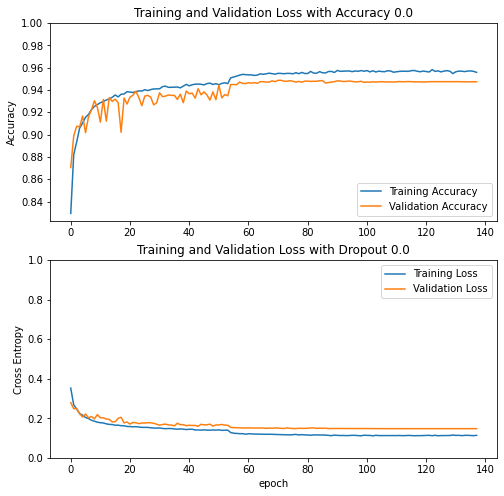

258/258 [==============================] - 5s 18ms/step - loss: 0.1382 - accuracy: 0.9472
Test accuracy : 0.9472468495368958


2022-11-29 09:49:46.380823: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2527334400 exceeds 10% of free system memory.
2022-11-29 09:49:51.042484: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2527334400 exceeds 10% of free system memory.
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 5.735s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 3.375556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.242020
[t-SNE] KL divergence after 2500 iterations: 1.894094


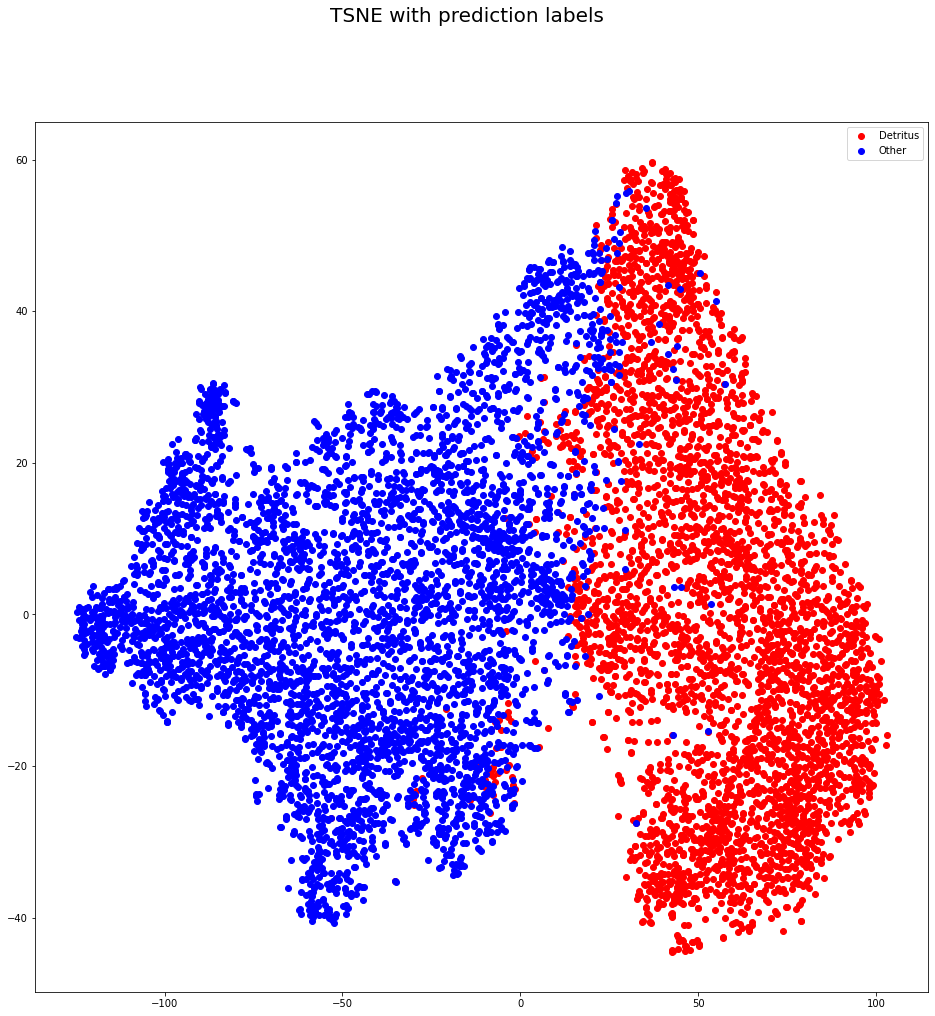

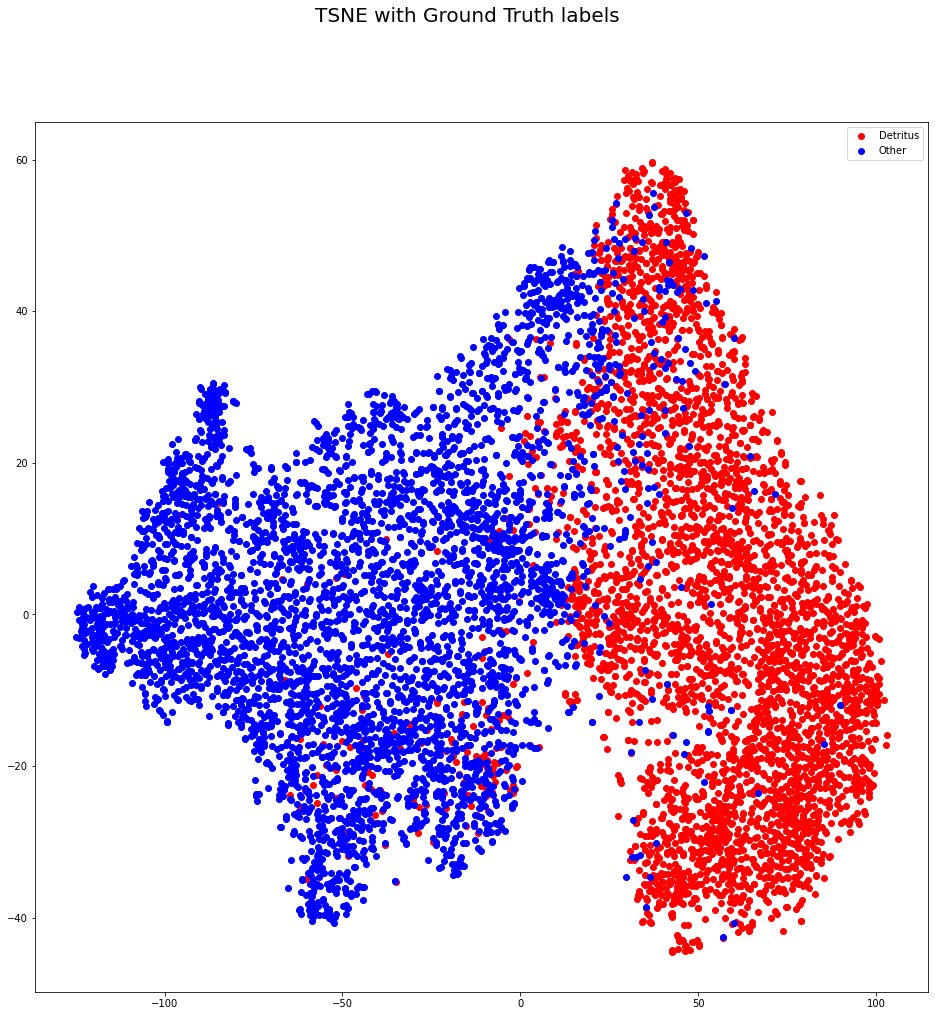

In [11]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_b_lr', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [9]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

# MobileNetV2 Model From Scratch

Training model, epochs:  200
Epoch 1/200


2022-12-01 07:31:59.345528: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-01 07:31:59.388402: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100020000 Hz
2022-12-01 07:32:00.314775: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-01 07:32:00.818992: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302
2022-12-01 07:32:01.365738: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-01 07:32:01.366755: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1200/1200 [==============================] - 118s 94ms/step - loss: 0.3172 - accuracy: 0.8560 - val_loss: 0.9440 - val_accuracy: 0.4639


2022-12-01 07:34:03.446053: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 2/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2547 - accuracy: 0.8917 - val_loss: 1.1596 - val_accuracy: 0.4639
Epoch 3/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.2318 - accuracy: 0.9030 - val_loss: 2.2758 - val_accuracy: 0.4639
Epoch 4/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2179 - accuracy: 0.9103 - val_loss: 0.6958 - val_accuracy: 0.8640


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 5/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2067 - accuracy: 0.9173 - val_loss: 5.9518 - val_accuracy: 0.5361
Epoch 6/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2005 - accuracy: 0.9206 - val_loss: 3.2646 - val_accuracy: 0.5367
Epoch 7/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.1969 - accuracy: 0.9219 - val_loss: 3.7967 - val_accuracy: 0.5363
Epoch 8/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1850 - accuracy: 0.9277 - val_loss: 1.1093 - val_accuracy: 0.6321
Epoch 9/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1814 - accuracy: 0.9300 - val_loss: 4.3682 - val_accuracy: 0.5481
Epoch 10/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1772 - accuracy: 0.9316 - val_loss: 0.7936 - val_accuracy: 0.7623
Epoch 11/200
1200/1200 [======================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 12/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1650 - accuracy: 0.9354 - val_loss: 1.2339 - val_accuracy: 0.6631
Epoch 13/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1639 - accuracy: 0.9362 - val_loss: 0.6200 - val_accuracy: 0.7902
Epoch 14/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1590 - accuracy: 0.9381 - val_loss: 0.4731 - val_accuracy: 0.8676
Epoch 15/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1563 - accuracy: 0.9393 - val_loss: 0.4378 - val_accuracy: 0.8861
Epoch 16/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1521 - accuracy: 0.9420 - val_loss: 0.2624 - val_accuracy: 0.9171


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 17/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1488 - accuracy: 0.9429 - val_loss: 0.2920 - val_accuracy: 0.9156
Epoch 18/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1487 - accuracy: 0.9442 - val_loss: 0.3577 - val_accuracy: 0.8947
Epoch 19/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1458 - accuracy: 0.9437 - val_loss: 0.2277 - val_accuracy: 0.9273


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 20/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1448 - accuracy: 0.9447 - val_loss: 0.2483 - val_accuracy: 0.9233
Epoch 21/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1438 - accuracy: 0.9455 - val_loss: 0.2498 - val_accuracy: 0.9263
Epoch 22/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1388 - accuracy: 0.9474 - val_loss: 0.1904 - val_accuracy: 0.9342


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 23/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1400 - accuracy: 0.9466 - val_loss: 0.2742 - val_accuracy: 0.9068
Epoch 24/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1390 - accuracy: 0.9470 - val_loss: 0.2186 - val_accuracy: 0.9288
Epoch 25/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1363 - accuracy: 0.9476 - val_loss: 0.1730 - val_accuracy: 0.9318


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 26/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1355 - accuracy: 0.9477 - val_loss: 0.1930 - val_accuracy: 0.9361
Epoch 27/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1348 - accuracy: 0.9494 - val_loss: 0.1889 - val_accuracy: 0.9341
Epoch 28/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1327 - accuracy: 0.9501 - val_loss: 0.1726 - val_accuracy: 0.9391


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 29/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1325 - accuracy: 0.9500 - val_loss: 0.1695 - val_accuracy: 0.9292


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 30/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1322 - accuracy: 0.9498 - val_loss: 0.1816 - val_accuracy: 0.9376
Epoch 31/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1295 - accuracy: 0.9516 - val_loss: 0.1804 - val_accuracy: 0.9288
Epoch 32/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1293 - accuracy: 0.9506 - val_loss: 0.1706 - val_accuracy: 0.9453
Epoch 33/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1282 - accuracy: 0.9525 - val_loss: 0.1580 - val_accuracy: 0.9420


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 34/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1273 - accuracy: 0.9519 - val_loss: 0.1456 - val_accuracy: 0.9474


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 35/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1263 - accuracy: 0.9520 - val_loss: 0.1932 - val_accuracy: 0.9390
Epoch 36/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1260 - accuracy: 0.9531 - val_loss: 0.1507 - val_accuracy: 0.9407
Epoch 37/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.1235 - accuracy: 0.9539 - val_loss: 0.1684 - val_accuracy: 0.9330
Epoch 38/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1237 - accuracy: 0.9531 - val_loss: 0.1686 - val_accuracy: 0.9403
Epoch 39/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1238 - accuracy: 0.9533 - val_loss: 0.1552 - val_accuracy: 0.9395
Epoch 40/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1206 - accuracy: 0.9543 - val_loss: 0.1728 - val_accuracy: 0.9361
Epoch 41/200
1200/1200 [=================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 46/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1024 - accuracy: 0.9618 - val_loss: 0.1230 - val_accuracy: 0.9520


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 47/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1010 - accuracy: 0.9618 - val_loss: 0.1220 - val_accuracy: 0.9533


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 48/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.0992 - accuracy: 0.9631 - val_loss: 0.1239 - val_accuracy: 0.9525
Epoch 49/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0991 - accuracy: 0.9622 - val_loss: 0.1229 - val_accuracy: 0.9532
Epoch 50/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0993 - accuracy: 0.9632 - val_loss: 0.1261 - val_accuracy: 0.9486
Epoch 51/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0987 - accuracy: 0.9626 - val_loss: 0.1237 - val_accuracy: 0.9520
Epoch 52/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0984 - accuracy: 0.9627 - val_loss: 0.1264 - val_accuracy: 0.9496
Epoch 53/200
1200/1200 [==============================] - 112s 93ms/step - loss: 0.0978 - accuracy: 0.9635 - val_loss: 0.1223 - val_accuracy: 0.9540
Epoch 54/200
1200/1200 [=================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 55/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0972 - accuracy: 0.9637 - val_loss: 0.1219 - val_accuracy: 0.9539
Epoch 56/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0962 - accuracy: 0.9643 - val_loss: 0.1233 - val_accuracy: 0.9523
Epoch 57/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0976 - accuracy: 0.9629 - val_loss: 0.1216 - val_accuracy: 0.9537
Epoch 58/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.0965 - accuracy: 0.9638 - val_loss: 0.1215 - val_accuracy: 0.9533
Epoch 59/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0930 - accuracy: 0.9644 - val_loss: 0.1219 - val_accuracy: 0.9553
Epoch 60/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0952 - accuracy: 0.9649 - val_loss: 0.1214 - val_accuracy: 0.9539
Epoch 61/200
1200/1200 [=================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 62/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0942 - accuracy: 0.9643 - val_loss: 0.1204 - val_accuracy: 0.9539


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 63/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0961 - accuracy: 0.9639 - val_loss: 0.1220 - val_accuracy: 0.9533
Epoch 64/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0929 - accuracy: 0.9656 - val_loss: 0.1224 - val_accuracy: 0.9533
Epoch 65/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0932 - accuracy: 0.9648 - val_loss: 0.1215 - val_accuracy: 0.9549
Epoch 66/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0940 - accuracy: 0.9652 - val_loss: 0.1218 - val_accuracy: 0.9551
Epoch 67/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0932 - accuracy: 0.9650 - val_loss: 0.1226 - val_accuracy: 0.9542
Epoch 68/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.0927 - accuracy: 0.9656 - val_loss: 0.1255 - val_accuracy: 0.9525
Epoch 69/200
1200/1200 [=================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 75/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0875 - accuracy: 0.9669 - val_loss: 0.1210 - val_accuracy: 0.9548
Epoch 76/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0890 - accuracy: 0.9666 - val_loss: 0.1209 - val_accuracy: 0.9544
Epoch 77/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0896 - accuracy: 0.9656 - val_loss: 0.1209 - val_accuracy: 0.9543
Epoch 78/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 0.1206 - val_accuracy: 0.9548
Epoch 79/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0889 - accuracy: 0.9657 - val_loss: 0.1207 - val_accuracy: 0.9548
Epoch 80/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0893 - accuracy: 0.9664 - val_loss: 0.1206 - val_accuracy: 0.9543
Epoch 81/200
1200/1200 [=================

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch_lr/assets
Epoch 82/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0876 - accuracy: 0.9680 - val_loss: 0.1205 - val_accuracy: 0.9545

Epoch 00082: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 83/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0889 - accuracy: 0.9675 - val_loss: 0.1206 - val_accuracy: 0.9544
Epoch 84/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0877 - accuracy: 0.9672 - val_loss: 0.1206 - val_accuracy: 0.9545
Epoch 85/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0880 - accuracy: 0.9666 - val_loss: 0.1206 - val_accuracy: 0.9548
Epoch 86/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.0895 - accuracy: 0.9660 - val_loss: 0.1205 - val_accuracy: 0.9544
Epoch 87/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.0887 - accuracy: 0.9653 -

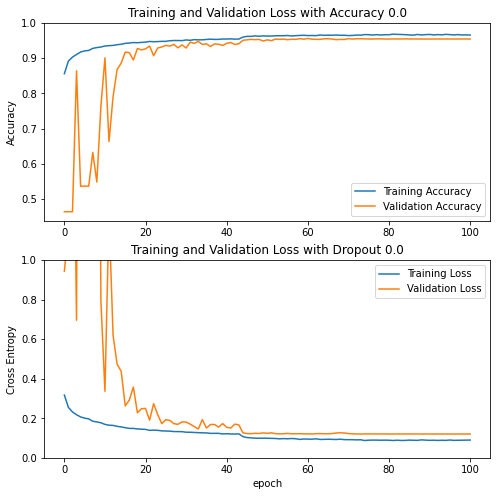

258/258 [==============================] - 6s 25ms/step - loss: 0.1145 - accuracy: 0.9599
Test accuracy : 0.9598881602287292


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.012s...
[t-SNE] Computed neighbors for 8227 samples in 3.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.205795
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.274117
[t-SNE] KL divergence after 2500 iterations: 0.907726


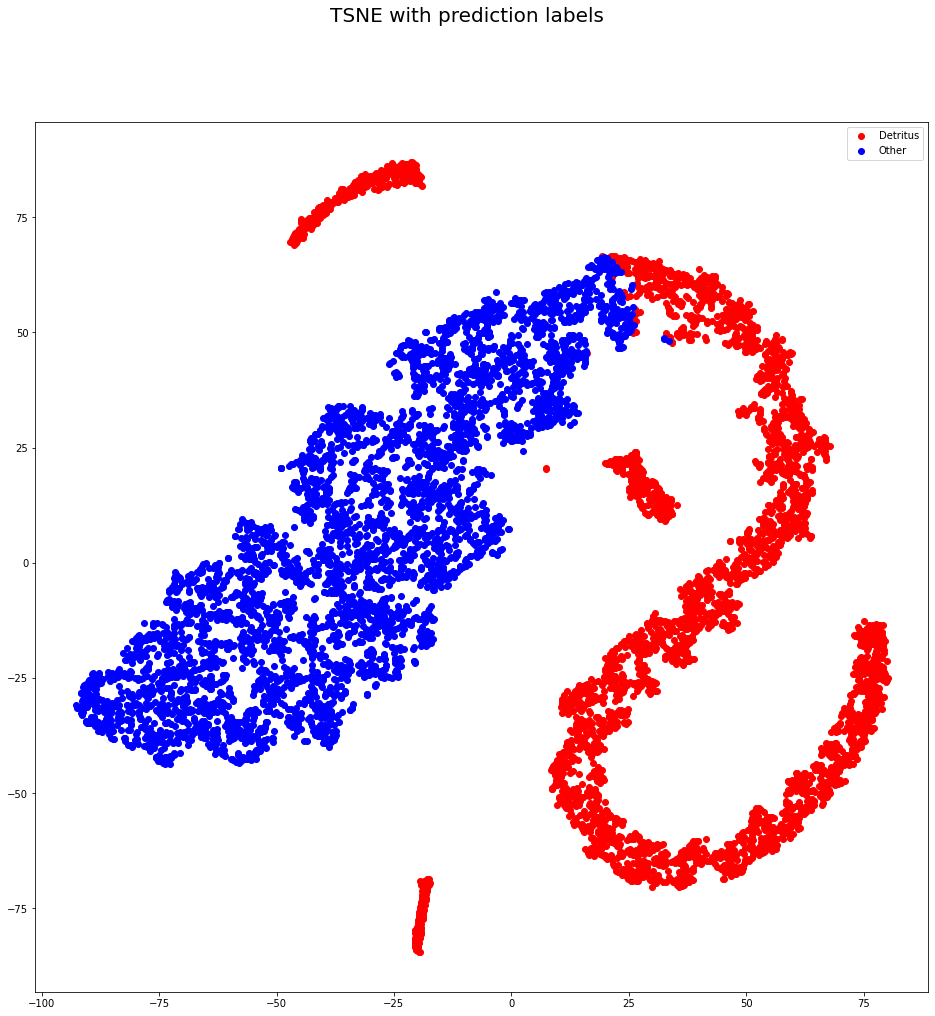

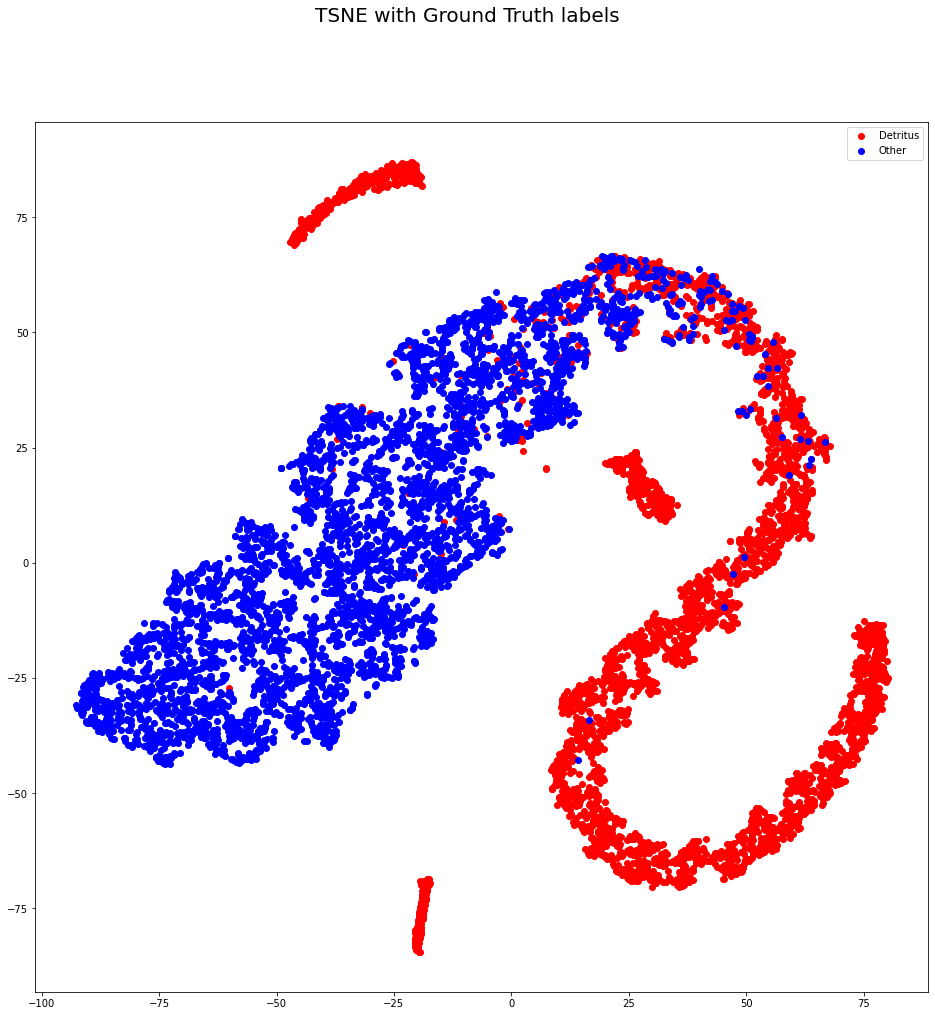

In [10]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch_lr', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

# DenseNet model

In [11]:
base_learning_rate = 0.0001

mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft_lr', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=(160, 160, 3))
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    show_plot(dense_history_fine, 0.0)
    print_tsne(dense_model, test_dataset, 2500)

In [12]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

Epoch 1/200
1200/1200 [==============================] - 102s 77ms/step - loss: 0.3352 - accuracy: 0.8537 - val_loss: 0.2450 - val_accuracy: 0.8991
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 2/200
1200/1200 [==============================] - 88s 74ms/step - loss: 0.2384 - accuracy: 0.8986 - val_loss: 0.2200 - val_accuracy: 0.9117
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 3/200
1200/1200 [==============================] - 89s 74ms/step - loss: 0.2185 - accuracy: 0.9083 - val_loss: 0.2090 - val_accuracy: 0.9153
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 4/200
1200/1200 [==============================] - 89s 74ms/step - loss: 0.2092 - accuracy: 0.9126 - val_loss: 0.2034 - val_accuracy: 0.9187
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 5/200
1200/1200 [==============================] - 89s 74ms/step - loss: 0.2063 - accuracy: 0.9155 - val_loss: 0.1991 - val_accuracy: 0.9199
INFO:tensorflow:Assets writt

1200/1200 [==============================] - 90s 75ms/step - loss: 0.1764 - accuracy: 0.9287 - val_loss: 0.1758 - val_accuracy: 0.9279
Epoch 43/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1764 - accuracy: 0.9281 - val_loss: 0.1760 - val_accuracy: 0.9286
Epoch 44/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1761 - accuracy: 0.9286 - val_loss: 0.1758 - val_accuracy: 0.9292
Epoch 45/200
1200/1200 [==============================] - 89s 75ms/step - loss: 0.1751 - accuracy: 0.9297 - val_loss: 0.1759 - val_accuracy: 0.9282
Epoch 46/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1735 - accuracy: 0.9284 - val_loss: 0.1756 - val_accuracy: 0.9292
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 47/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1769 - accuracy: 0.9278 - val_loss: 0.1755 - val_accuracy: 0.9283
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 4

Epoch 90/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1706 - accuracy: 0.9302 - val_loss: 0.1732 - val_accuracy: 0.9302
Epoch 91/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1697 - accuracy: 0.9312 - val_loss: 0.1731 - val_accuracy: 0.9308
Epoch 92/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1725 - accuracy: 0.9299 - val_loss: 0.1733 - val_accuracy: 0.9313
Epoch 93/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1712 - accuracy: 0.9293 - val_loss: 0.1733 - val_accuracy: 0.9305
Epoch 94/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1714 - accuracy: 0.9308 - val_loss: 0.1733 - val_accuracy: 0.9306
Epoch 95/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1715 - accuracy: 0.9309 - val_loss: 0.1734 - val_accuracy: 0.9303
Epoch 96/200
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1726 - accuracy: 0.9306 - val_

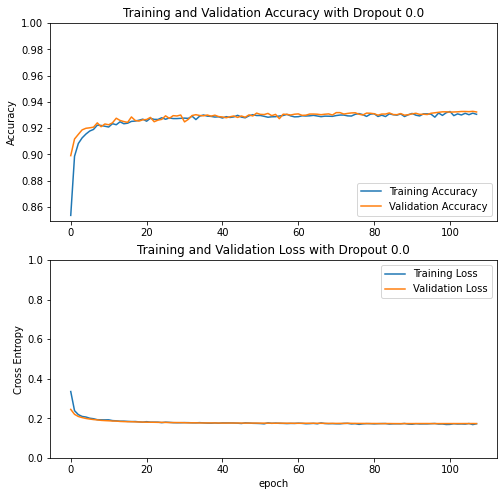

Epoch 108/400
1200/1200 [==============================] - 123s 90ms/step - loss: 0.1707 - accuracy: 0.9325 - val_loss: 0.1715 - val_accuracy: 0.9341
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 109/400
1200/1200 [==============================] - 106s 88ms/step - loss: 0.1659 - accuracy: 0.9350 - val_loss: 0.1673 - val_accuracy: 0.9379
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 110/400
1200/1200 [==============================] - 106s 88ms/step - loss: 0.1594 - accuracy: 0.9382 - val_loss: 0.1647 - val_accuracy: 0.9391
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 111/400
1200/1200 [==============================] - 107s 89ms/step - loss: 0.1550 - accuracy: 0.9391 - val_loss: 0.1687 - val_accuracy: 0.9424
Epoch 112/400
1200/1200 [==============================] - 106s 89ms/step - loss: 0.1548 - accuracy: 0.9404 - val_loss: 0.1609 - val_accuracy: 0.9402
INFO:tensorflow:Assets written to: .dense_net_ft_lr/assets
Epoch 113/400


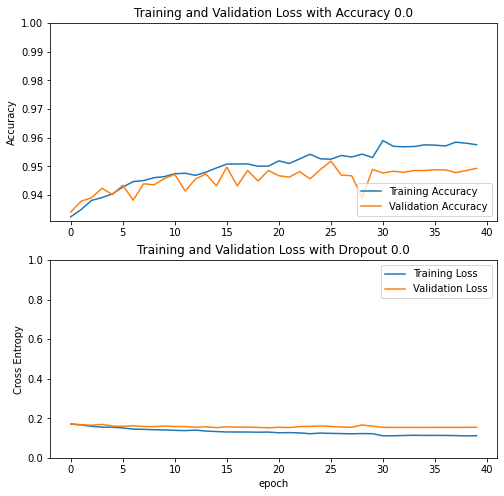

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.018s...
[t-SNE] Computed neighbors for 8227 samples in 2.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 7.215098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.789124
[t-SNE] KL divergence after 2500 iterations: 2.177799


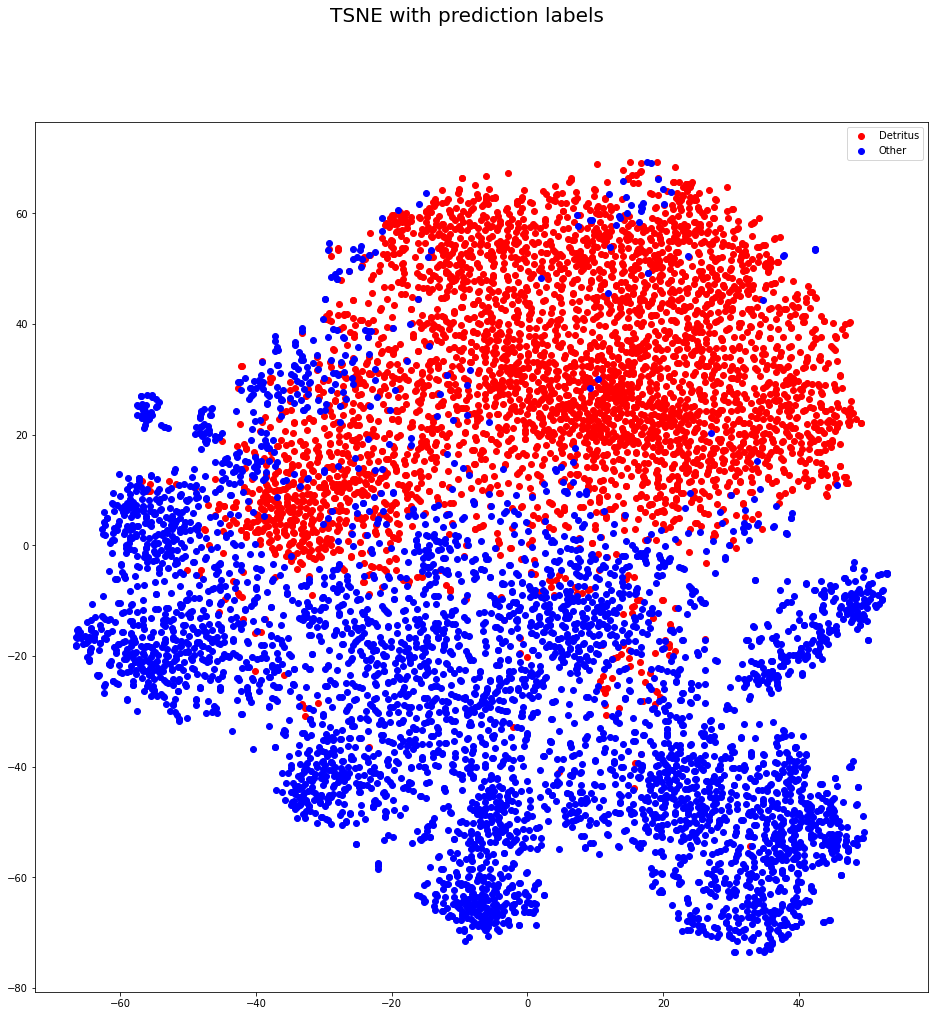

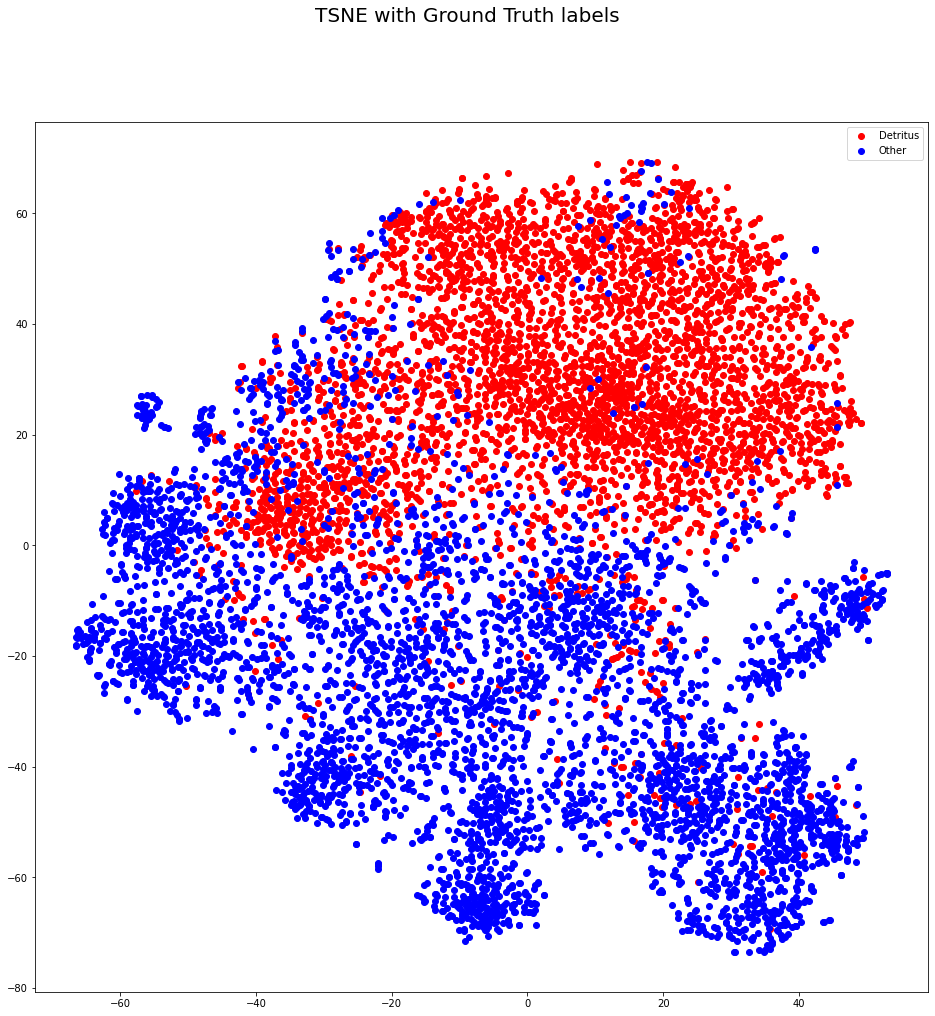

In [13]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0, denseNetModel, base_dense_model)

In [14]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

# Inception Resnet V2 Fine Tuning 

In [15]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.inception_resnet_v2_lr', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

    inception_resnet_base_model.trainable = False

    ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
    ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    ir_prediction_layer = tf.keras.layers.Dense(1)

    ir_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(ir_inputs)
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)
    else:
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(ir_inputs)
    ir_x = inception_resnet_base_model(ir_x, training=False)
    ir_x = ir_global_average_layer(ir_x)
    if drop_value > 0:
        ir_x = keras.layers.Dropout(drop_value)(ir_x)
    ir_outputs = ir_prediction_layer(ir_x)
    ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
    ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    ir_history = ir_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = ir_history.history['accuracy']
    val_acc = ir_history.history['val_accuracy']

    loss = ir_history.history['loss']
    val_loss = ir_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    inception_resnet_base_model.trainable = True
    
    ir_fine_tune_at = 755
    
    for layer in inception_resnet_base_model.layers[:ir_fine_tune_at]:
        layer.trainable =  False
        
    ir_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    ir_history_fine = ir_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=ir_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[callback])
    
    acc += ir_history_fine.history['accuracy']
    val_acc += ir_history_fine.history['val_accuracy']

    loss += ir_history_fine.history['loss']
    val_loss += ir_history_fine.history['val_loss']
    
    loss, accuracy = ir_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    show_plot(ir_history_fine, 0.0)
    print_tsne(ir_model, test_dataset, 2500)
    

In [ ]:
do_transfer_learning(0.0, True, 0.0)

Epoch 1/200
1200/1200 [==============================] - 116s 89ms/step - loss: 0.2992 - accuracy: 0.8692 - val_loss: 0.2330 - val_accuracy: 0.9024
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 2/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.2283 - accuracy: 0.9057 - val_loss: 0.2136 - val_accuracy: 0.9099
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 3/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.2167 - accuracy: 0.9109 - val_loss: 0.2046 - val_accuracy: 0.9178
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 4/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.2088 - accuracy: 0.9157 - val_loss: 0.2007 - val_accuracy: 0.9153
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 5/200
1200/1200 [==============================] - 104s 86ms/step - loss: 0.2022 - accuracy: 0.9173 - val_loss: 0.1979 - val_accuracy: 0.9

Epoch 41/200
1200/1200 [==============================] - 104s 86ms/step - loss: 0.1740 - accuracy: 0.9310 - val_loss: 0.1745 - val_accuracy: 0.9306
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 42/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1750 - accuracy: 0.9297 - val_loss: 0.1745 - val_accuracy: 0.9312
Epoch 43/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1744 - accuracy: 0.9294 - val_loss: 0.1741 - val_accuracy: 0.9316
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 44/200
1200/1200 [==============================] - 104s 86ms/step - loss: 0.1733 - accuracy: 0.9307 - val_loss: 0.1743 - val_accuracy: 0.9296
Epoch 45/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1736 - accuracy: 0.9310 - val_loss: 0.1752 - val_accuracy: 0.9285
Epoch 46/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1708 - accuracy: 0.9321 - val_loss: 0.17

1200/1200 [==============================] - 104s 87ms/step - loss: 0.1665 - accuracy: 0.9343 - val_loss: 0.1697 - val_accuracy: 0.9350
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 88/200
1200/1200 [==============================] - 105s 87ms/step - loss: 0.1658 - accuracy: 0.9342 - val_loss: 0.1697 - val_accuracy: 0.9333
Epoch 89/200
1200/1200 [==============================] - 105s 87ms/step - loss: 0.1666 - accuracy: 0.9329 - val_loss: 0.1696 - val_accuracy: 0.9353
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 90/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1664 - accuracy: 0.9338 - val_loss: 0.1696 - val_accuracy: 0.9351
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoch 91/200
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1653 - accuracy: 0.9340 - val_loss: 0.1695 - val_accuracy: 0.9346
INFO:tensorflow:Assets written to: .inception_resnet_v2_lr/assets
Epoc